<a href="https://colab.research.google.com/github/nhanguyenai/HomeWork-Predict/blob/main/BankNotesRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os # Import the os module

base_dir = '/content/drive/MyDrive/Banknotes Recognition data' # Thay đường dẫn thực tế của bạn
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
img_width, img_height = 150, 150 # Kích thước ảnh đầu vào
batch_size = 32
num_classes = len(os.listdir(train_dir)) # Số lượng mệnh giá tiền

# Data augmentation cho tập huấn luyện
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Chỉ rescale cho tập validation và test
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical' # Sử dụng 'categorical' cho bài toán phân loại đa lớp
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Không xáo trộn dữ liệu validation
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Không xáo trộn dữ liệu test
)

Found 1570 images belonging to 6 classes.
Found 88 images belonging to 6 classes.
Found 143 images belonging to 6 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax') # Số lượng output units bằng số lượng lớp, activation là softmax
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy', # Sử dụng categorical_crossentropy cho phân loại đa lớp
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,686 (13.18 MB)

 Trainable params: 3,455,686 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
epochs = 100
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 890s 18s/step - accuracy: 0.2030 - loss: 1.7721 - val_accuracy: 0.0000e+00 - val_loss: 1.7844
Epoch 2/100
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1875 - loss: 1.7969

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.1875 - loss: 1.7969 - val_accuracy: 0.0000e+00 - val_loss: 1.7796
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.2417 - loss: 1.7513 - val_accuracy: 0.0156 - val_loss: 1.7334
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2812 - loss: 1.7565 - val_accuracy: 0.0000e+00 - val_loss: 1.7375
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 415ms/step - accuracy: 0.2535 - loss: 1.7480 - val_accuracy: 0.3750 - val_loss: 1.7091
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1562 - loss: 1.7348 - val_accuracy: 0.3438 - val_loss: 1.7108
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 376ms/step - accuracy: 0.2323 - loss: 1.7482 - val_accuracy: 0.1094 - val_loss: 1.7376
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1562 - loss: 1.7774 - val_accuracy: 0.0938 - val_loss: 1.7374
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 393ms/step - accuracy: 0.2344 - loss: 1.7363 - val_accuracy

In [9]:
model.save('vietnamese_banknote_model.h5')
print("Mô hình đã được lưu.")

Mô hình đã được lưu.


In [10]:
from tensorflow.keras.models import load_model

model = load_model('vietnamese_banknote_model.h5') # Thay tên file nếu bạn lưu khác

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [12]:
class_names = list(train_generator.class_indices.keys())
print("Các lớp (mệnh giá tiền):", class_names)

Các lớp (mệnh giá tiền): ['10000', '100000', '20000', '200000', '50000', '500000']


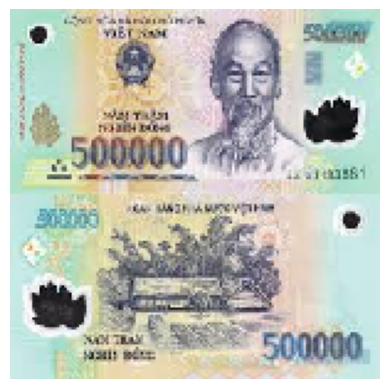

In [13]:
img_path = '/content/tien viet nam.jpg' # Thay đường dẫn đến ảnh của bạn

img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Thêm chiều batch
img_array /= 255. # Rescale về khoảng [0, 1]

plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = predictions[0][predicted_class_index]

predicted_class_name = class_names[predicted_class_index]

print(f"Ảnh này được dự đoán là: {predicted_class_name} với độ tin cậy {confidence*100:.2f}%")
if predicted_class_name in class_names:
    print("Đây có vẻ là tiền Việt Nam.")
else:
    print("Đây không phải là tiền Việt Nam (hoặc không thuộc các mệnh giá đã được huấn luyện).")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
Ảnh này được dự đoán là: 500000 với độ tin cậy 79.44%
Đây có vẻ là tiền Việt Nam.


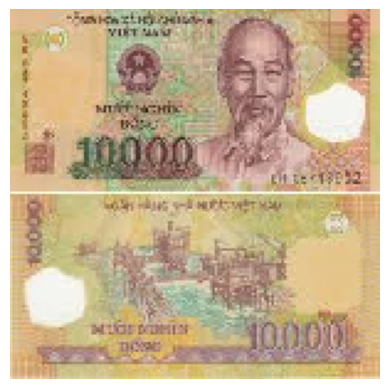

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Ảnh này được dự đoán là: 20000 với độ tin cậy 63.37%
Đây có vẻ là tiền Việt Nam.


In [16]:
img_path = '/content/10kvnd.jpg' # Thay đường dẫn đến ảnh của bạn

img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Thêm chiều batch
img_array /= 255. # Rescale về khoảng [0, 1]

plt.imshow(img)
plt.axis('off')
plt.show()
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = predictions[0][predicted_class_index]

predicted_class_name = class_names[predicted_class_index]

print(f"Ảnh này được dự đoán là: {predicted_class_name} với độ tin cậy {confidence*100:.2f}%")
if predicted_class_name in class_names:
    print("Đây có vẻ là tiền Việt Nam.")
else:
    print("Đây không phải là tiền Việt Nam (hoặc không thuộc các mệnh giá đã được huấn luyện).")

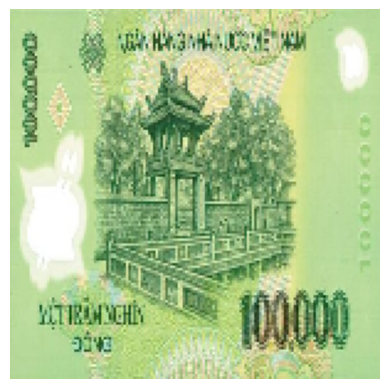

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Ảnh này được dự đoán là: 100000 với độ tin cậy 72.52%
Đây có vẻ là tiền Việt Nam.


In [17]:
img_path = '/content/100kvnd.jpg' # Thay đường dẫn đến ảnh của bạn

img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Thêm chiều batch
img_array /= 255. # Rescale về khoảng [0, 1]

plt.imshow(img)
plt.axis('off')
plt.show()
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = predictions[0][predicted_class_index]

predicted_class_name = class_names[predicted_class_index]

print(f"Ảnh này được dự đoán là: {predicted_class_name} với độ tin cậy {confidence*100:.2f}%")
if predicted_class_name in class_names:
    print("Đây có vẻ là tiền Việt Nam.")
else:
    print("Đây không phải là tiền Việt Nam (hoặc không thuộc các mệnh giá đã được huấn luyện).")

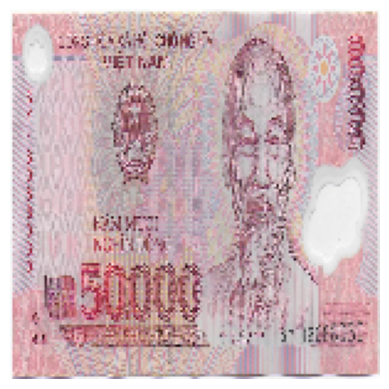

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Ảnh này được dự đoán là: 200000 với độ tin cậy 89.73%
Đây có vẻ là tiền Việt Nam.


In [18]:
img_path = '/content/50kvnd.jpg' # Thay đường dẫn đến ảnh của bạn

img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Thêm chiều batch
img_array /= 255. # Rescale về khoảng [0, 1]

plt.imshow(img)
plt.axis('off')
plt.show()
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = predictions[0][predicted_class_index]

predicted_class_name = class_names[predicted_class_index]

print(f"Ảnh này được dự đoán là: {predicted_class_name} với độ tin cậy {confidence*100:.2f}%")
if predicted_class_name in class_names:
    print("Đây có vẻ là tiền Việt Nam.")
else:
    print("Đây không phải là tiền Việt Nam (hoặc không thuộc các mệnh giá đã được huấn luyện).")